In [86]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense,Dropout
import tensorflow as tf
import random
from sklearn.model_selection import TimeSeriesSplit
import statsmodels.api as sm

import xgboost as xgb
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score

import lightgbm
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR
from lightgbm import early_stopping 

In [87]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/climate-indeices/ONI.xlsx
/kaggle/input/climate-indeices/ENSO.xlsx
/kaggle/input/climate-indeices/AMO.xlsx
/kaggle/input/climate-indeices/NAO.xlsx
/kaggle/input/climate-indeices/SOI.xlsx
/kaggle/input/feature-engineering/__results__.html
/kaggle/input/feature-engineering/__notebook__.ipynb
/kaggle/input/feature-engineering/__output__.json
/kaggle/input/feature-engineering/finaldatset.csv
/kaggle/input/feature-engineering/custom.css
/kaggle/input/amirkabirdam/holiday.csv
/kaggle/input/amirkabirdam/dam12.csv
/kaggle/input/d/homaabedinzadeh/futuredays/90days.csv
/kaggle/input/d/homaabedinzadeh/holidayname/holidayname.csv


In [88]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [126]:
df = pd.read_csv('/kaggle/input/feature-engineering/finaldatset.csv')


In [127]:
df.drop('DateRow', inplace=True , axis=1)

In [128]:
df.columns

Index(['soi_shift_1', 'soi_shiftdiv_1', 'soi_shift_3', 'soi_shiftdiv_3',
       'soi_shift_6', 'soi_shiftdiv_6', 'soi_shift_9', 'soi_shiftdiv_9',
       'soi_shift_12', 'soi_shiftdiv_12',
       ...
       'DarajeHararatTar18_5', 'NamNesbi6_5', 'NamNesbi12_5', 'NamNesbi18_5',
       'Total_in', 'day_of_week', 'day_of_year', 'year_water', 'sumbeforeyear',
       'std_TotalAbBarfVBaran_in'],
      dtype='object', length=2059)

In [129]:
horizon=-15

In [130]:
target = df['Total_in'].shift(horizon)

target.dropna(inplace=True)

In [131]:
df.head()

soi_shift_1  soi_shiftdiv_1  soi_shift_3  soi_shiftdiv_3  soi_shift_6  \
0          0.7             1.0          0.0             0.0          0.0   
1          0.7             1.0          0.0             0.0          0.0   
2          0.7             1.0          0.0             0.0          0.0   
3          0.7             1.0          0.0             0.0          0.0   
4          0.7             1.0          0.0             0.0          0.0   

   soi_shiftdiv_6  soi_shift_9  soi_shiftdiv_9  soi_shift_12  soi_shiftdiv_12  \
0             0.0         -0.3       -0.428571           0.7              1.0   
1             0.0         -0.3       -0.428571           0.7              1.0   
2             0.0         -0.3       -0.428571           0.7              1.0   
3             0.0         -0.3       -0.428571           0.7              1.0   
4             0.0         -0.3       -0.428571           0.7              1.0   

   soi_rollingmean_2  soi_rollingstd_2  soi_rollingmin_2  soi_rollingmax_2  \
0                0.7               0.0               0.7               0.7   
1                0.7               0.0               0.7               0.7   
2                0.7               0.0               0.7               0.7   
3                0.7               0.0               0.7               0.7   
4                0.7               0.0               0.7               0.7   

   soi_rollingsum_2  soi_div_rollingmean_2  soi_div_rollingstd_2  \
0               1.4                    1.0                   inf   
1               1.4                    1.0                   inf   
2               1.4                    1.0                   inf   
3               1.4                    1.0                   inf   
4               1.4                    1.0                   inf   

   soi_div_rollingmax_2  soi_rollingmean_3  soi_rollingstd_3  \
0                   1.0           0.733333          0.057735   
1                   1.0           0.733333          0.057735   
2                   1.0           0.733333          0.057735   
3                   1.0           0.733333          0.057735   
4                   1.0           0.733333          0.057735   

   soi_rollingmin_3  soi_rollingmax_3  soi_rollingsum_3  \
0               0.7               0.8               2.2   
1               0.7               0.8               2.2   
2               0.7               0.8               2.2   
3               0.7               0.8               2.2   
4               0.7               0.8               2.2   

   soi_div_rollingmean_3  soi_div_rollingstd_3  soi_div_rollingmax_3  \
0               0.954545             12.124356                 0.875   
1               0.954545             12.124356                 0.875   
2               0.954545             12.124356                 0.875   
3               0.954545             12.124356                 0.875   
4               0.954545             12.124356                 0.875   

   soi_rollingmean_4  soi_rollingstd_4  soi_rollingmin_4  soi_rollingmax_4  \
0               0.55          0.369685               0.0               0.8   
1               0.55          0.369685               0.0               0.8   
2               0.55          0.369685               0.0               0.8   
3               0.55          0.369685               0.0               0.8   
4               0.55          0.369685               0.0               0.8   

   soi_rollingsum_4  soi_div_rollingmean_4  soi_div_rollingstd_4  \
0               2.2               1.272727              1.893506   
1               2.2               1.272727              1.893506   
2               2.2               1.272727              1.893506   
3               2.2               1.272727              1.893506   
4               2.2               1.272727              1.893506   

   soi_div_rollingmax_4  soi_rollingmean_5  soi_rollingstd_5  \
0                 0.875               0.32          0.605805   
1 

In [132]:
y=target

x = df[:horizon]
#. drop(target,axis=1)

In [133]:
x.shape

(8020, 2059)

In [134]:
len(y)

8020

In [135]:
x.replace([np.inf, -np.inf], np.nan, inplace=True)
x.fillna(0, inplace=True)

/tmp/ipykernel_33/781971186.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x.replace([np.inf, -np.inf], np.nan, inplace=True)
/tmp/ipykernel_33/781971186.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x.fillna(0, inplace=True)


In [84]:
x.shape

(8020, 2063)

/tmp/ipykernel_33/1871686354.py:35: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  XGB_predictions = pd.concat([XGB_predictions, df_temp], ignore_index=True)


rmse: 1.0742305922650819
r2: 0.7552008154285774
mape: 0.3113027080913038
rmse: 0.9123270650050918
r2: 0.8626920783330052
mape: 0.30157730982557945
rmse: 0.8145041297897064
r2: 0.5860652277915657
mape: 0.624924554489349
rmse: 1.8465956826374201
r2: 0.6507518908563981
mape: 0.22480635262205298
rmse: 1.1774923215984272
r2: 0.7950479206184167
mape: 0.20390029142948293
rmse: 0.6453740887338977
r2: 0.7676059433576308
mape: 0.21459458415355068
rmse: 0.6547287844770698
r2: 0.6686489178129293
mape: 0.21540581701945072
rmse: 0.8570362481588374
r2: 0.6357367120079342
mape: 0.2390714311856684
rmsetrain: 0.0491351577832692 rmsetest 0.9977861140831916
r2train: 0.9957110172928662 r2test: 0.7152186882758071
mapetest: 0.2919478811020547


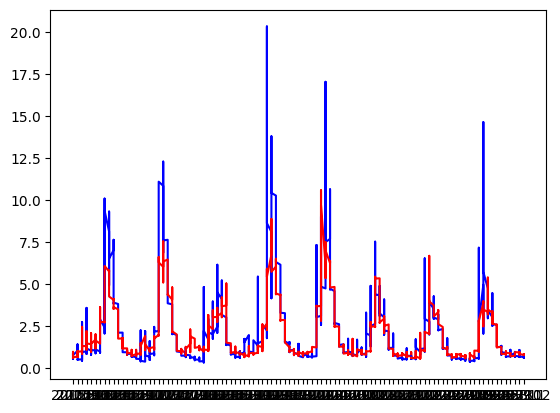

In [160]:
tscv = TimeSeriesSplit(n_splits = 20)
test_rmse = []
train_rmse= []
test_r2 = []
train_r2=[]
test_mape=[]
XGB_predictions = pd.DataFrame(columns=['predictXGB'])


i=0
for train_index, test_index in tscv.split(x):
    i+=1
    X_train, X_test = x.iloc[train_index], x.iloc[test_index]
    Y_train, Y_test = y.iloc[train_index], y.iloc[test_index]
    if i>=13:
        
        model = xgb.XGBRegressor(n_estimators=10000,early_stopping_rounds=10, learning_rate=0.07,  max_depth= 15 ,colsample_bytree= 0.85,  n_jobs=4)
        
        model.fit(X_train, Y_train,sample_weight=X_train['std_TotalAbBarfVBaran_in'], eval_set=[(X_test,Y_test)],verbose=False)

    # Predictions
        test_predict = model.predict(X_test)
        train_predict = model.predict(X_train)
        Y_test= (np.exp(Y_test)-100)/1000
        test_predict= (np.exp(test_predict)-100)/1000
        
        y_final.append(Y_test)
        test_rmse.append ( np.sqrt(mean_squared_error(Y_test, test_predict)))
        train_rmse.append ( np.sqrt(mean_squared_error(Y_train, train_predict)))
       
        test_mape.append (mean_absolute_percentage_error(Y_test, test_predict))
        df_temp = pd.DataFrame({'predictXGB': test_predict})

        # استفاده از pd.concat برای اضافه کردن پیش‌بینی‌ها به دیتافریم اصلی
        XGB_predictions = pd.concat([XGB_predictions, df_temp], ignore_index=True)
        
        test_r2 .append ( r2_score(Y_test, test_predict))
        train_r2 .append ( r2_score(Y_train, train_predict))
        print ('rmse:',np.sqrt(mean_squared_error(Y_test, test_predict)))
        print ('r2:', r2_score(Y_test, test_predict))
        print ('mape:', mean_absolute_percentage_error(Y_test, test_predict))

        plt.plot( X_test['Year'].astype(str) + X_test['month'].astype(str) ,Y_test, color='blue')
        plt.plot( X_test['Year'].astype(str) + X_test['month'].astype(str) ,test_predict, color='red')
print("rmsetrain:",np.mean(train_rmse),"rmsetest",np.mean(test_rmse))
print ("r2train:",np.mean(train_r2),'r2test:',np.mean(test_r2) )

print ('mapetest:',np.mean(test_mape))




In [161]:
XGB_predictions.shape

(3048, 1)

In [67]:

imp = pd.DataFrame({'Importance':model.feature_importances_,'Feature':x.columns})
fe=imp.sort_values(by='Importance',ascending=False).head(50)
fe.head(50)

,Importance,Feature
526,0.248863,MinDarajehararat_in_rollingmean_180
530,0.070724,MinDarajehararat_in_rollingsum_180
307,0.047726,enso_rollingmax_5
1673,0.036812,Total_in_rollingmax_7
585,0.024442,MaxDarajehararat_in_rollingmax_180
1257,0.018118,DarajeHararatKhosk12_5_rollingmax_180
1741,0.017751,Total_in
201,0.016053,amo_div_rollingmean_3
1311,0.015826,DarajeHararatKhosk18_5_rollingstd_180
1360,0.014445,DarajeHararatTar6_5_rollingmin_90


0 399
400 780
0 780
781 1161
0 1161
1162 1542
0 1542
1543 1923
0 1923
1924 2304
0 2304
2305 2685
0 2685
2686 3066
0 3066
3067 3447
0 3447
3448 3828
0 3828
3829 4209
0 4209
4210 4590
0 4590
4591 4971
0 4971
4972 5352
Training until validation scores don't improve for 40 rounds
Early stopping, best iteration is:
[81]	valid_0's l2: 0.0713339


/tmp/ipykernel_33/4174236990.py:36: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  LGB_predictions= pd.concat([LGB_predictions, df_temp], ignore_index=True)
/tmp/ipykernel_33/4174236990.py:37: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  TestSet= pd.concat([TestSet, test_temp], ignore_index=True)


rmse: 0.984214215076915
r2: 0.794508339729194
mape: 0.1896368599976006
0 5352
5353 5733
Training until validation scores don't improve for 40 rounds
Early stopping, best iteration is:
[115]	valid_0's l2: 0.0809786
rmse: 0.9665646283550668
r2: 0.8458809682201043
mape: 0.2648747144413406
0 5733
5734 6114
Training until validation scores don't improve for 40 rounds
Early stopping, best iteration is:
[65]	valid_0's l2: 0.127619
rmse: 0.6248667020892423
r2: 0.7563759860788788
mape: 0.3933356069149994
0 6114
6115 6495
Training until validation scores don't improve for 40 rounds
Early stopping, best iteration is:
[79]	valid_0's l2: 0.131546
rmse: 2.035674577153958
r2: 0.5755689600913003
mape: 0.22437712927746284
0 6495
6496 6876
Training until validation scores don't improve for 40 rounds
Early stopping, best iteration is:
[195]	valid_0's l2: 0.051723
rmse: 1.0087768450163257
r2: 0.8495728000928644
mape: 0.16919378924373776
0 6876
6877 7257
Training until validation scores don't improve for 4

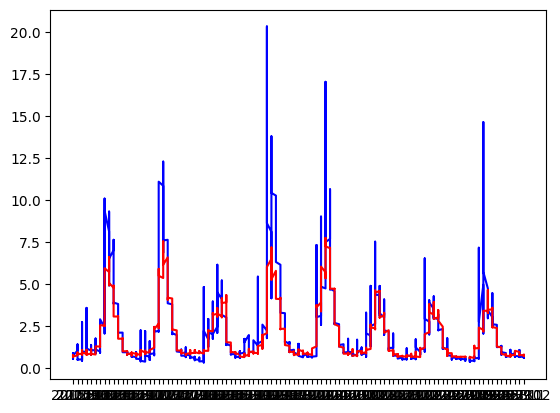

In [164]:
tscv = TimeSeriesSplit(n_splits = 20)
test_rmse = []
train_rmse= []
test_r2 = []
train_r2=[]
test_mape=[]
LGB_predictions = pd.DataFrame(columns=['predictLGB'])
TestSet=pd.DataFrame(columns=['Test'])
i=0
for train_index, test_index in tscv.split(x):
    
    i+=1
    X_train, X_test = x.iloc[train_index], x.iloc[test_index]
    Y_train, Y_test = y.iloc[train_index], y.iloc[test_index]
    print (train_index.min(),train_index.max())
    print (test_index.min(),test_index.max())
    if i>=13:
        lgb = lightgbm.LGBMRegressor( n_estimators=10000, num_leaves=31, learning_rate=0.05, colsample_bytree=0.85,verbose=0)

        lgb.fit(X_train, Y_train,sample_weight=X_train['std_TotalAbBarfVBaran_in'], eval_set=(X_test,Y_test),callbacks=([early_stopping(stopping_rounds=40)]))

        test_predict = lgb.predict(X_test, num_iteration=lgb.best_iteration_)
        train_predict = lgb.predict(X_train, num_iteration=lgb.best_iteration_)
        Y_test= (np.exp(Y_test)-100)/1000
        test_predict= (np.exp(test_predict)-100)/1000
        
        test_rmse.append ( np.sqrt(mean_squared_error(Y_test, test_predict)))
        train_rmse.append ( np.sqrt(mean_squared_error(Y_train, train_predict)))

        test_r2 .append ( r2_score(Y_test, test_predict))
        train_r2 .append ( r2_score(Y_train, train_predict))
        test_mape.append (mean_absolute_percentage_error(Y_test, test_predict))
        df_temp = pd.DataFrame({'predictLGB': test_predict})
        test_temp = pd.DataFrame({'Test': Y_test})
        # استفاده از pd.concat برای اضافه کردن پیش‌بینی‌ها به دیتافریم اصلی
        LGB_predictions= pd.concat([LGB_predictions, df_temp], ignore_index=True)
        TestSet= pd.concat([TestSet, test_temp], ignore_index=True)
        
        plt.plot( X_test['Year'].astype(str) + X_test['month'].astype(str) ,Y_test, color='blue')
        plt.plot( X_test['Year'].astype(str) + X_test['month'].astype(str) ,test_predict, color='red')
        print ('rmse:',np.sqrt(mean_squared_error(Y_test, test_predict)))
        print ('r2:', r2_score(Y_test, test_predict))
        print ('mape:', mean_absolute_percentage_error(Y_test, test_predict))
        #plt.show()
print("rmsetrain:",np.mean(train_rmse),"rmsetest",np.mean(test_rmse))
print ("r2train:",np.mean(train_r2),'r2test:',np.mean(test_r2) )

print ('mapetest:',np.mean(test_mape))



In [165]:
final=pd.concat ([LGB_predictions ,XGB_predictions, TestSet], axis=1) 

In [173]:
final['mean_column'] = (final['predictLGB'] + final['predictXGB']) / 2

final.head()

,predictLGB,predictXGB,Test,mean_column
0,0.736572,0.652551,0.579480,0.694562
1,0.728037,0.662264,0.559000,0.695150
2,0.729325,0.648275,0.570210,0.688800
3,0.730473,0.659828,0.570950,0.695151
4,0.729275,0.654420,0.913088,0.691848


In [174]:
r2_score(final['Test'], final['mean_column'])


0.7657487237276589

In [111]:
imp = pd.DataFrame({'Importance':lgb.feature_importances_,'Feature':x.columns})
fe=imp.sort_values(by='Importance',ascending=False).head(50)
fe.head(50)

,Importance,Feature
1912,54,Total_in_rollingmin_7
519,43,TotalAbBarfVBaran_in_rollingstd_180
584,41,MinDarajehararat_in_rollingmean_180
1986,36,std_TotalAbBarfVBaran_in
1467,32,DarajeHararatKhosk18_5_rollingstd_180
655,32,MaxDarajehararat_in_rollingmax_180
1913,30,Total_in_rollingmax_7
652,28,MaxDarajehararat_in_rollingmean_180
1983,28,day_of_year
1981,26,Total_in


In [177]:

df.dropna(inplace=True, axis=1)
df.shape

(8035, 1987)

In [178]:
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.fillna(0, inplace=True)

In [179]:
target=df['Total_in'].shift(horizon)
y=target

#x = scaled_df. drop(columns =[ target ],axis=1)#,'index'

In [180]:
x=df.drop(columns=['Total_in'], axis=1)

In [181]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(x)
scaled_df = pd.DataFrame(scaled_data, columns=x.columns)

In [182]:
x=scaled_df[:horizon]

In [183]:
x.shape

(8020, 1986)

In [184]:
y.dropna(inplace=True)

In [185]:
y.shape

(8020,)

rmse: 0.9845173598431072
r2: 0.7943817345373552
mape: 0.23897440376071014
rmse: 1.015993609859095
r2: 0.8297149861970946
mape: 0.23856206618406955
rmse: 0.6784475825551419
r2: 0.7128043035884244
mape: 0.42810239167859887
rmse: 2.3447945183147905
r2: 0.4368812189883817
mape: 0.28077640279454363
rmse: 1.1537953746818987
r2: 0.8032142036645277
mape: 0.21609286630553315
rmse: 1.2166219308644863
r2: 0.17412703641990457
mape: 0.5078677059492444
rmse: 0.5757167544369813
r2: 0.7437975603873794
mape: 0.17325533141331212
rmse: 0.8486019317329191
r2: 0.6428710523121631
mape: 0.3398940612782906
rmsetrain: 0.18538538987884534 rmsetest 0.3453373719172234
r2train: 0.9415846164071092 r2test: 0.7515776739306597
mapetest: 0.03802471366896429


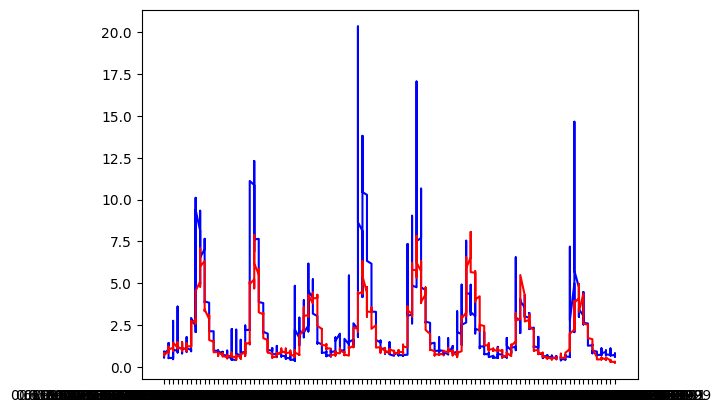

In [186]:
tscv = TimeSeriesSplit(n_splits = 20)
test_rmse = []
train_rmse= []
test_r2 = []
train_r2=[]
test_mape=[]
predictMLP=[]
i=0
for train_index, test_index in tscv.split(x):
    i+=1
    X_train, X_test = x.iloc[train_index], x.iloc[test_index]
    Y_train, Y_test = y.iloc[train_index], y.iloc[test_index]
    if i>=13:
        
        mlp = MLPRegressor(hidden_layer_sizes=(300,100), activation='relu', solver='adam', max_iter=200,learning_rate='constant', early_stopping=True,alpha=  0.05)

        mlp.fit(X_train, Y_train )

        test_predict = mlp.predict(X_test)
        train_predict = mlp.predict(X_train)
        
        test_rmse.append ( np.sqrt(mean_squared_error(Y_test, test_predict)))
        train_rmse.append ( np.sqrt(mean_squared_error(Y_train, train_predict)))
        
        test_r2 .append ( r2_score(Y_test, test_predict))
        train_r2 .append ( r2_score(Y_train, train_predict))
        test_mape.append (mean_absolute_percentage_error(Y_test, test_predict))
        Y_test= (np.exp(Y_test)-100)/1000
        test_predict= (np.exp(test_predict)-100)/1000
        predictMLP.append ( test_predict)
        plt.plot( X_test['Year'].astype(str) + X_test['month'].astype(str) ,Y_test, color='blue')
        plt.plot( X_test['Year'].astype(str) + X_test['month'].astype(str) ,test_predict, color='red')
        print ('rmse:',np.sqrt(mean_squared_error(Y_test, test_predict)))
        print ('r2:', r2_score(Y_test, test_predict))
        print ('mape:', mean_absolute_percentage_error(Y_test, test_predict))
        
print("rmsetrain:",np.mean(train_rmse),"rmsetest",np.mean(test_rmse))
print ("r2train:",np.mean(train_r2),'r2test:',np.mean(test_r2) )
print ('mapetest:',np.mean(test_mape))




rmse: 0.0001619738840274171
r2: 0.6443562234632356
mape: 0.0012804811618536969
rmse: 9.575010263031311e-05
r2: 0.8976214489490927
mape: 0.00073831642151838
rmse: 0.00011865091190448646
r2: 0.7280058387169244
mape: 0.0010191474473005718
rmse: 0.00019181756741264375
r2: 0.6252388894958254
mape: 0.0014328439099319243
rmse: 0.00010072561063587315
r2: 0.8918973675335992
mape: 0.0007201434573385437
rmse: 0.00011115287523690358
r2: 0.749373188791305
mape: 0.0008321214616592112
rmse: 8.953843295876206e-05
r2: 0.8177015558256078
mape: 0.0007259148404960067
rmse: 0.0001078393257279827
r2: 0.771598824586291
mape: 0.0007543282074931405
rmsetrain: 0.03515226921369162 rmsetest 0.0832139938247093
r2train: 0.9647913657159518 r2test: 0.7649807044707981
mapetest: 238563196261.14154


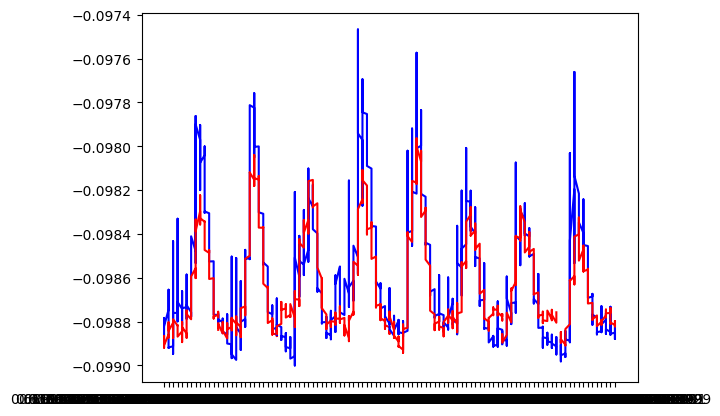

In [56]:
scv = TimeSeriesSplit(n_splits = 20)
test_rmse = []
train_rmse= []
test_r2 = []
train_r2=[]
test_mape=[]
predictSVR=[]
i=0
for train_index, test_index in tscv.split(x):
    i+=1
    X_train, X_test = x.iloc[train_index], x.iloc[test_index]
    Y_train, Y_test = y.iloc[train_index], y.iloc[test_index]
    if i>=13:
        
        svr = SVR(kernel='rbf', C=1.0, epsilon=0.001)

        # آموزش مدل
        svr.fit(X_train, Y_train)

        # پیش‌بینی
        test_predict = svr.predict(X_test)
        train_predict = svr.predict(X_train)
        predictSVR.append(test_predict)
        test_rmse.append ( np.sqrt(mean_squared_error(Y_test, test_predict)))
        train_rmse.append ( np.sqrt(mean_squared_error(Y_train, train_predict)))
        
        test_r2 .append ( r2_score(Y_test, test_predict))
        train_r2 .append ( r2_score(Y_train, train_predict))
        test_mape.append (mean_absolute_percentage_error(Y_test, test_predict))
        Y_test= (np.exp(Y_test)-100)/1000
        test_predict= (np.exp(test_predict)-100)/1000
        plt.plot( X_test['Year'].astype(str) + X_test['month'].astype(str) ,Y_test, color='blue')
        plt.plot( X_test['Year'].astype(str) + X_test['month'].astype(str) ,test_predict, color='red')
        print ('rmse:',np.sqrt(mean_squared_error(Y_test, test_predict)))
        print ('r2:', r2_score(Y_test, test_predict))
        print ('mape:', mean_absolute_percentage_error(Y_test, test_predict))
        #plt.show()
        
print("rmsetrain:",np.mean(train_rmse),"rmsetest",np.mean(test_rmse))
print ("r2train:",np.mean(train_r2),'r2test:',np.mean(test_r2) )
print ('mapetest:',np.mean(test_mape))